<a href="https://colab.research.google.com/github/yusongod0303/networkmap_2023_08/blob/main/Data_visualization_(networkmap).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 라이브러리 설정
import random
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
import operator

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

print(os.getcwd())

/content


In [4]:
edu = pd.read_csv('/content/drive/MyDrive/data_smedu3.csv')
edu

course1  DAC00001  DAC10004  DAC10005  DAC10051  DAC10052  DAC16095  \
0    DAC00001       NaN       NaN       NaN       NaN       NaN       NaN   
1    DAC10004       NaN       NaN       NaN       NaN       NaN       NaN   
2    DAC10005       NaN       NaN       NaN       NaN       NaN       NaN   
3    DAC10051       NaN       NaN       NaN       NaN       NaN       NaN   
4    DAC10052       NaN       NaN       NaN       NaN       NaN       NaN   
..        ...       ...       ...       ...       ...       ...       ...   
480  HATT0211       NaN       NaN       NaN       NaN       NaN       NaN   
481  HAUS0009       NaN       NaN       NaN       NaN       NaN       NaN   
482  HAUS0020       NaN       NaN       NaN       NaN       NaN       NaN   
483  HAXA0005       NaN       NaN       NaN       NaN       NaN       NaN   
484  HAXA0009       NaN       NaN       NaN       NaN       NaN       NaN   

     DAC16096  DAC16107  DAC16128  ...  HATT0103  HATT0104  HATT0200  \
0         NaN       NaN       NaN  ...       NaN       NaN       NaN   
1         NaN       NaN       NaN  ...       NaN       NaN       NaN   
2         NaN       NaN       NaN  ...       NaN       NaN       NaN   
3         NaN       NaN       NaN  ...       NaN       NaN       NaN   
4         NaN       NaN       NaN  ...       NaN       NaN       NaN   
..        ...       ...       ...  ...       ...       ...       ...   
480       NaN       NaN       NaN  ...       NaN       NaN       NaN   
481       NaN       NaN       NaN  ...         1       NaN       NaN   
482       NaN       NaN       NaN  ...         4         3         3   
483       NaN       NaN       NaN  ...       NaN       NaN       NaN   
484       NaN       NaN       NaN  ...       NaN       NaN       NaN   

     HATT0206  HATT0210  HATT0211  HAUS0009  HAUS0020  HAXA0005  HAXA0009  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...       ...       ...  
480       NaN         1       NaN       NaN       NaN       NaN       NaN  
481       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
482         5         4       NaN       NaN       NaN       NaN       NaN  
483       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
484       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[485 rows x 486 columns]

In [5]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Columns: 486 entries, course1 to HAXA0009
dtypes: float64(383), object(103)
memory usage: 1.8+ MB


In [6]:
index_course1_edu = edu.set_index('course1')
index_course1_edu

DAC00001  DAC10004  DAC10005  DAC10051  DAC10052  DAC16095  \
course1                                                                
DAC00001       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10004       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10005       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10051       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10052       NaN       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
HATT0211       NaN       NaN       NaN       NaN       NaN       NaN   
HAUS0009       NaN       NaN       NaN       NaN       NaN       NaN   
HAUS0020       NaN       NaN       NaN       NaN       NaN       NaN   
HAXA0005       NaN       NaN       NaN       NaN       NaN       NaN   
HAXA0009       NaN       NaN       NaN       NaN       NaN       NaN   

          DAC16096  DAC16107  DAC16128  DAC16130  ...  HATT0103  HATT0104  \
course1                                           ...                       
DAC00001       NaN       NaN       NaN       NaN  ...       NaN       NaN   
DAC10004       NaN       NaN       NaN       NaN  ...       NaN       NaN   
DAC10005       NaN       NaN       NaN       NaN  ...       NaN       NaN   
DAC10051       NaN       NaN       NaN       NaN  ...       NaN       NaN   
DAC10052       NaN       NaN       NaN       NaN  ...       NaN       NaN   
...            ...       ...       ...       ...  ...       ...       ...   
HATT0211       NaN       NaN       NaN       NaN  ...       NaN       NaN   
HAUS0009       NaN       NaN       NaN       NaN  ...         1       NaN   
HAUS0020       NaN       NaN       NaN       NaN  ...         4         3   
HAXA0005       NaN       NaN       NaN       NaN  ...       NaN       NaN   
HAXA0009       NaN       NaN       NaN       NaN  ...       NaN       NaN   

          HATT0200  HATT0206  HATT0210  HATT0211  HAUS0009  HAUS0020  \
course1                                                                
DAC00001       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10004       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10005       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10051       NaN       NaN       NaN       NaN       NaN       NaN   
DAC10052       NaN       NaN       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
HATT0211       NaN       NaN         1       NaN       NaN       NaN   
HAUS0009       NaN       NaN       NaN       NaN       NaN       NaN   
HAUS0020         3         5         4       NaN       NaN       NaN   
HAXA0005       NaN       NaN       NaN       NaN       NaN       NaN   
HAXA0009       NaN       NaN       NaN       NaN       NaN       NaN   

          HAXA0005  HAXA0009  
course1                       
DAC00001       NaN       NaN  
DAC10004       NaN       NaN  
DAC10005       NaN       NaN  
DAC10051       NaN       NaN  
DAC10052       NaN       NaN  
...            ...       ...  
HATT0211       NaN       NaN  
HAUS0009       NaN       NaN  
HAUS0020       NaN       NaN  
HAXA0005       NaN       NaN  
HAXA0009       NaN       NaN  

[485 rows x 485 columns]

In [7]:
index_course1_edu = index_course1_edu.apply(pd.to_numeric, errors='coerce')

In [8]:
index_course1_edu = index_course1_edu.fillna(0)
index_course1_edu

DAC00001  DAC10004  DAC10005  DAC10051  DAC10052  DAC16095  \
course1                                                                
DAC00001       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10004       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10005       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10051       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10052       0.0       0.0       0.0       0.0       0.0       0.0   
...            ...       ...       ...       ...       ...       ...   
HATT0211       0.0       0.0       0.0       0.0       0.0       0.0   
HAUS0009       0.0       0.0       0.0       0.0       0.0       0.0   
HAUS0020       0.0       0.0       0.0       0.0       0.0       0.0   
HAXA0005       0.0       0.0       0.0       0.0       0.0       0.0   
HAXA0009       0.0       0.0       0.0       0.0       0.0       0.0   

          DAC16096  DAC16107  DAC16128  DAC16130  ...  HATT0103  HATT0104  \
course1                                           ...                       
DAC00001       0.0       0.0       0.0       0.0  ...       0.0       0.0   
DAC10004       0.0       0.0       0.0       0.0  ...       0.0       0.0   
DAC10005       0.0       0.0       0.0       0.0  ...       0.0       0.0   
DAC10051       0.0       0.0       0.0       0.0  ...       0.0       0.0   
DAC10052       0.0       0.0       0.0       0.0  ...       0.0       0.0   
...            ...       ...       ...       ...  ...       ...       ...   
HATT0211       0.0       0.0       0.0       0.0  ...       0.0       0.0   
HAUS0009       0.0       0.0       0.0       0.0  ...       1.0       0.0   
HAUS0020       0.0       0.0       0.0       0.0  ...       4.0       3.0   
HAXA0005       0.0       0.0       0.0       0.0  ...       0.0       0.0   
HAXA0009       0.0       0.0       0.0       0.0  ...       0.0       0.0   

          HATT0200  HATT0206  HATT0210  HATT0211  HAUS0009  HAUS0020  \
course1                                                                
DAC00001       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10004       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10005       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10051       0.0       0.0       0.0       0.0       0.0       0.0   
DAC10052       0.0       0.0       0.0       0.0       0.0       0.0   
...            ...       ...       ...       ...       ...       ...   
HATT0211       0.0       0.0       1.0       0.0       0.0       0.0   
HAUS0009       0.0       0.0       0.0       0.0       0.0       0.0   
HAUS0020       3.0       5.0       4.0       0.0       0.0       0.0   
HAXA0005       0.0       0.0       0.0       0.0       0.0       0.0   
HAXA0009       0.0       0.0       0.0       0.0       0.0       0.0   

          HAXA0005  HAXA0009  
course1                       
DAC00001       0.0       0.0  
DAC10004       0.0       0.0  
DAC10005       0.0       0.0  
DAC10051       0.0       0.0  
DAC10052       0.0       0.0  
...            ...       ...  
HATT0211       0.0       0.0  
HAUS0009       0.0       0.0  
HAUS0020       0.0       0.0  
HAXA0005       0.0       0.0  
HAXA0009       0.0       0.0  

[485 rows x 485 columns]

In [9]:
# 데이터프레임의 열을 노드로, 행과의 관계를 엣지로 표현하는 그래프 생성
G = nx.Graph()

# 열을 노드로 추가
for column in index_course1_edu.columns:
    G.add_node(column)

# 행과 열 간의 관계를 엣지로 추가 (값이 0이 아닌 경우에만)
for row_index, row in index_course1_edu.iterrows():
    for column in index_course1_edu.columns:
        if not pd.isnull(row[column]) and row[column] > 40:
            G.add_edge(column, f"Row {row_index}")

In [10]:
# 아무 값도 가지지 않는 노드 제거
isolates = list(nx.isolates(G))  # 아무 값도 가지지 않는 노드 찾기
G.remove_nodes_from(isolates)  # 노드 제거

In [11]:
# 그래프 그리기
plt.figure(figsize=(100, 80))
pos = nx.spring_layout(G)  # 노드의 위치 결정
nx.draw(G, pos, with_labels=True, font_size=50, font_weight='bold', node_size=30000)
plt.show()

<Figure size 50000x40000 with 0 Axes>

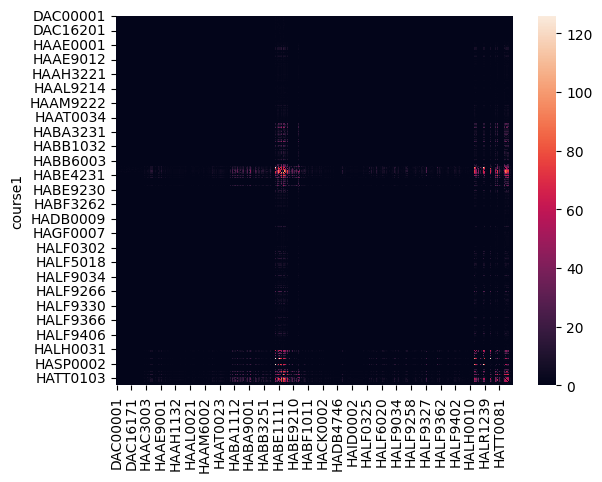

<Figure size 50000x40000 with 0 Axes>

In [ ]:
p1 = sns.heatmap(index_course1_edu)
plt.figure(figsize=(500, 400))
#....

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
"""
import community  # Louvain 알고리즘을 위한 모듈

# 그래프 생성 (데이터를 로드한 후 생성)
G_1 = nx.Graph()

# Louvain 알고리즘으로 노드 군집화
# 네트워크의 모듈성을 최적화해주는 알고리즘
partition = community.best_partition(G_1)

# 군집화 결과를 그래프에 추가
for node, cluster_id in partition.items():
    G_1.nodes[node]['cluster'] = cluster_id

# 군집별로 노드 색상을 다르게 설정하여 시각화
node_colors = [partition[node] for node in G_1.nodes]
pos = nx.spring_layout(G)  # 노드의 위치 결정
nx.draw(G_1, pos, node_color=node_colors, cmap='viridis', with_labels=True)
plt.show()
"""

AttributeError: ignored

In [ ]:
# 밑에서 부턴 network diagram이나 히트맵을 보면서 두 강의 간의 변수값을 분석 및 시각화

In [ ]:
#파이썬으로 arc diagram 생성 불가능
"""
# 네트워크 그래프 생성
G_arc = nx.Graph()
G_arc.add_edges_from(index_course1_edu)

# 각 노드의 위치 설정
pos = nx.circular_layout(G_arc)

# 각 엣지의 정보를 리스트로 저장
edge_x = []
edge_y = []

for edge in index_course1_edu:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# 아크 다이어그램 그리기
arc_diagram = go.Figure()

arc_diagram.add_trace(go.Scatter(
    x=edge_x,
    y=edge_y,
    mode="lines",
    line=dict(width=0.5, color="blue"),
))

arc_diagram.update_layout(
    showlegend=False,
    hovermode="closest",
    title="아크 다이어그램",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False)
)

arc_diagram.show()
"""

NetworkXError: ignored

In [ ]:
"""
# 일정 값 이상인 데이터 필터링
filtered_pie_chart = index_course1_edu[index_course1_edu.applymap(lambda x: x >= 20).all(axis=1)]

# Pie Chart 생성
fig_pie = px.pie(filtered_pie_chart, values="HABE3282", names="HABA9003", title=f"Pie Chart (Value >= 20)",)
fig_pie.show()
"""
# 네트워크 다이어그램을 보고 카테고리별 표

In [ ]:
"""
plt.hist2d(index_course1_edu.values.flatten(), bins=30, cmap='Blues')
plt.colorbar(label='Frequency')

plt.title('2D Histogram')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()
"""

TypeError: ignored